In [1]:
#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))  
import IPython.display as display

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

Enter the directory path to analyze WAV files: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/Prototype 4


Processing WAV files: 100%|█████████████████████████████████████| 484000/484000 [00:38<00:00, 12601.34it/s]


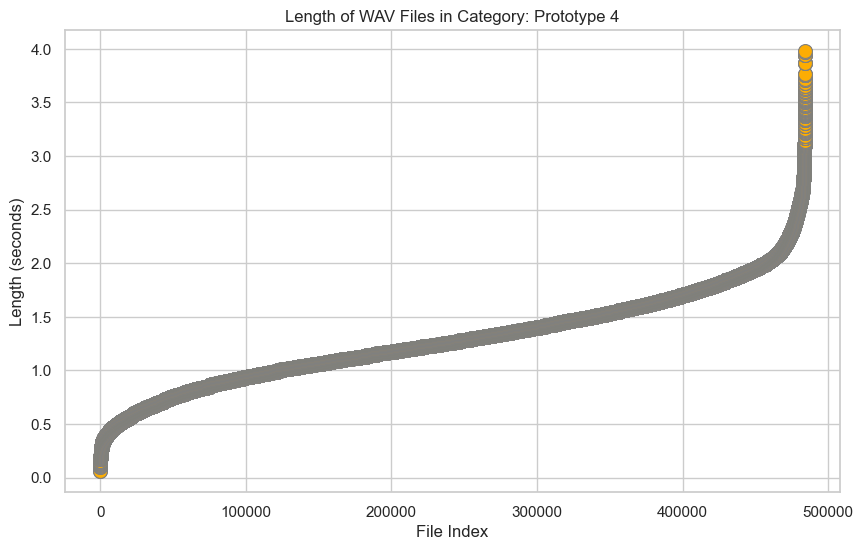

Processing WAV files: 100%|███████████████████████████████████████| 88000/88000 [00:07<00:00, 11014.25it/s]


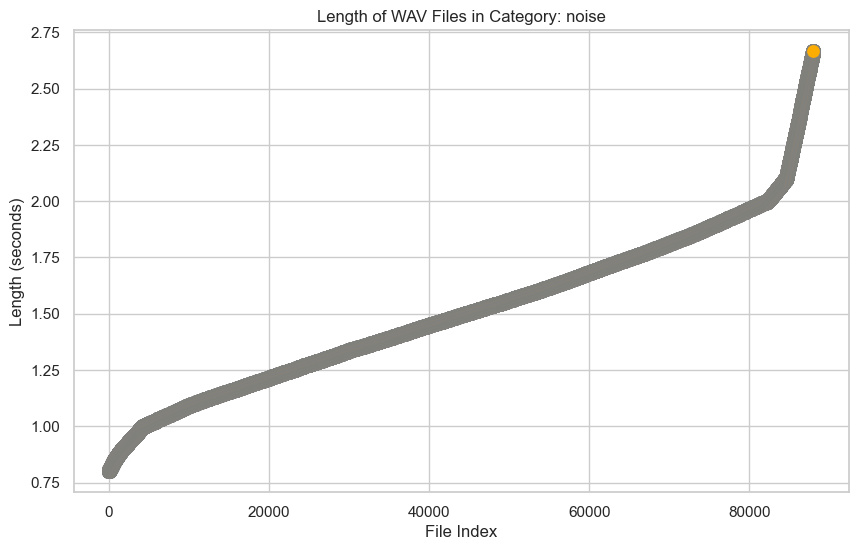

Processing WAV files: 100%|█████████████████████████████████████| 198000/198000 [00:17<00:00, 11323.01it/s]


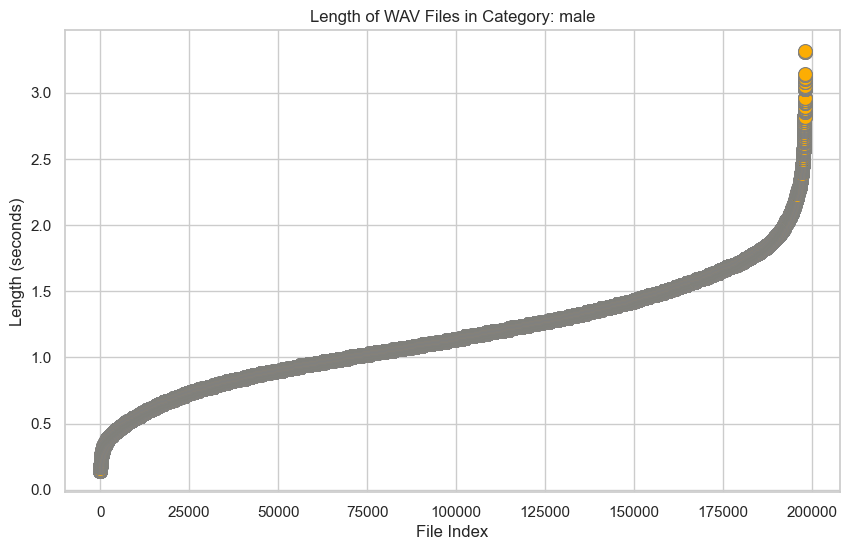

Processing WAV files: 100%|█████████████████████████████████████| 198000/198000 [00:15<00:00, 13173.88it/s]


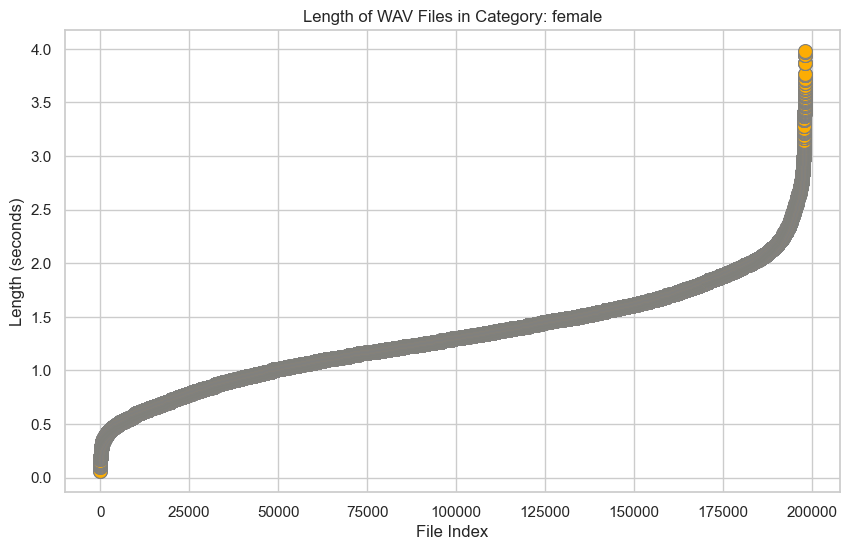

ModuleNotFoundError: No module named 'ace_tools'

In [3]:
def find_wav_files(directory):
    """ Recursively finds all WAV files in the given directory. """
    wav_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                wav_files.append(os.path.join(root, file))
    return wav_files

def get_wav_length(file_path):
    """ Returns the length of the WAV file in seconds. """
    audio = AudioSegment.from_wav(file_path)
    return len(audio) / 1000.0

def analyze_category_wav_files(wav_files):
    """ Analyzes WAV files in a category to get longest, shortest, average, and midpoint lengths. """
    lengths = []
    
    def process_file(file):
        length = get_wav_length(file)
        lengths.append(length)
    
    with ThreadPoolExecutor() as executor:
        list(tqdm(executor.map(process_file, wav_files), total=len(wav_files), desc="Processing WAV files"))
    
    if not lengths:
        print("No WAV files found in the directory.")
        return None, None, None, None, []
    
    lengths.sort()
    longest_length = max(lengths)
    shortest_length = min(lengths)
    average_length = sum(lengths) / len(lengths)
    midpoint_length = lengths[len(lengths) // 2]

    return longest_length, shortest_length, average_length, midpoint_length, lengths

def analyze_wav_files(directory):
    """ Analyzes WAV files to get the required metrics and plots for each category. """
    category_data = []
    categories = {}
    
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            category_name = os.path.basename(os.path.dirname(category_path))
            
            if category_name not in categories:
                categories[category_name] = []
            categories[category_name].extend(find_wav_files(category_path))
    
    for category_name, wav_files in categories.items():
        if wav_files:
            longest, shortest, average, midpoint, lengths = analyze_category_wav_files(wav_files)
            
            category_data.append({
                'Category': category_name,
                'Longest': longest,
                'Shortest': shortest,
                'Average': average,
                'Midpoint': midpoint
            })
            
            # Plotting
            plt.figure(figsize=(10, 6))
            sns.set(style="whitegrid")
            x_values = np.arange(len(lengths))
            sns.scatterplot(x=x_values, y=lengths, color='#fcad03', s=100, edgecolor='gray')
            plt.title(f'Length of WAV Files in Category: {category_name}')
            plt.xlabel('File Index')
            plt.ylabel('Length (seconds)')
            plt.show()
    
    df = pd.DataFrame(category_data)
    return df

# User input for directory path
directory_path = input("Enter the directory path to analyze WAV files: ")
df = analyze_wav_files(directory_path)
df

In [4]:
df

,Category,Longest,Shortest,Average,Midpoint
0,Prototype 4,3.978,0.06,1.293297,1.266
1,noise,2.666,0.80,1.511324,1.493
2,male,3.313,0.14,1.169145,1.130
3,female,3.978,0.06,1.320548,1.293
